# Business Case

## Project Title and Description: 

* BikeRental  

* The project aims to predict bike rental demand (cnt) using day-wise and hour-wise datasets by analyzing weather, season, and time-based various factors.

## Problem Statements

* Prepare a complete data analysis report on the given data.

* Prediction of daily bike rental count based on the environmental and seasonal settings.

## Goals:

* **Understand the business problem** of how features are affect rentals.
* Perform **basic checks** to gain a better understanding of the dataset
* Explore data patterns with **EDA and visualizations**.
* **Handle outliers**, **encode categorical/cyclic features**, and **scale numerical data**.
* **Build and evaluate models**: Linear Regression, Random Forest, Gradient Boosting, XGBoost.
* **Select best models** for day and hour data.

## Dataset Information:

 * **Dataset name**      : Day & Hour 
 * **Number of rows**    : Day  -  731,
                           Hour -  17379
 * **Number of columns** : Day  -  16,
                           Hour -  17
 * **Type of feature**   : Numerical and Binary

# Basic Checks

In [81]:
import numpy as np  # for numerical operations
import pandas as pd   # for work with datasets
import seaborn as sns  # for statastical visualization
import matplotlib.pyplot as plt   # used for plotting
import warnings   
warnings.filterwarnings("ignore",category=UserWarning)
import math

In [82]:
data_day=pd.read_csv('day.csv')
data_hour=pd.read_csv('hour.csv')
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Insight:
* Load dataset.
* show **day.csv** file data.

In [83]:
data_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Insight:
* Show **Hour.csv** file data.

In [84]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Insight:
* Show **first five rows** of data.

In [86]:
data_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [87]:
data_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Insight:
* Show **last five rows** of data.

In [88]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [89]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Insight:
* Both data **don't have** any null values.
* Datasets have **only numerical values**.

In [90]:
print('Days data:',data_day.shape)
print('Hours data:',data_hour.shape)

Days data: (731, 16)
Hours data: (17379, 17)


### Insight:
* There are 731 rows and 16 columns in day data.
* There are 17379 rows and 17 columns in hour data 

In [91]:
print('Days Data Columns:',data_day.columns)
print('\nHours Data Columns:',data_hour.columns)

Days Data Columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Hours Data Columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### Insight:
* Show **columns name** of datasets.

In [92]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [93]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Insight:
* Calculate mean, median, standard deviation, 25% value, 50% value and 75% value of dataset.
* In short **calculate average value** of each numerical features.

In [94]:
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [95]:
data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Insight:
* Both datasets **don't have** any null values.

In [96]:
print('Days Duplicate Data:',data_day.duplicated().sum())
print('Hours Duplicate Data:',data_hour.duplicated().sum())

Days Duplicate Data: 0
Hours Duplicate Data: 0


### Insight:
* Both data **don't have** any duplicate values.

In [97]:
data_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [98]:
data_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Insight:
* Show **total count of unique values** in each column.

### Split dteday and make new column Day

In [99]:
# Make sure dteday is in datetime format
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

# Extract day of the month
data_day['day'] = data_day['dteday'].dt.day
data_hour['day'] = data_hour['dteday'].dt.day

### Insight:
* **Extract day count** from dte column and make **new column 'day'** in both datasets..

In [100]:
data_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

In [101]:
data_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

### Remove columns

In [102]:
drop_cols = ['instant', 'dteday', 'casual', 'registered']

data_day = data_day.drop(columns=drop_cols, errors='ignore')
data_hour = data_hour.drop(columns=drop_cols, errors='ignore')

### Insight:
* **Remove unnecessary columns** from both datasets to avoid noise and improve model performance.

In [103]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')


# Exploratry Data Analysis

In [104]:
# Seperate numerical and binary columns
binary_cols=[]
num_cols=[]
for i in data_day.columns:
    if data_day[i].nunique()==2:
        binary_cols.append(i)
    else:
        num_cols.append(i)
print('Days Data-----')
print('binary columns are:',binary_cols)
print('numerical columns are:',num_cols)

Days Data-----
binary columns are: ['yr', 'holiday', 'workingday']
numerical columns are: ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day']


In [105]:
binary_cols_hour=[]
num_cols_hour=[]
for i in data_hour.columns:
    if data_hour[i].nunique()==2:
        binary_cols_hour.append(i)
    else:
        num_cols_hour.append(i)
print('Hours Data-----')
print('binary columns are:',binary_cols_hour)
print('numerical columns are:',num_cols_hour)

Hours Data-----
binary columns are: ['yr', 'holiday', 'workingday']
numerical columns are: ['season', 'mnth', 'hr', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day']


### Insight:
* **Seperated  binary and numerical columns** from both datasets.
* In day dataset: Total 16 columns, 3 binary and 10 numerical columns.
* In hour dataset: Total 17 columns, 3 binary and 11 numerical columns.

### Histplot

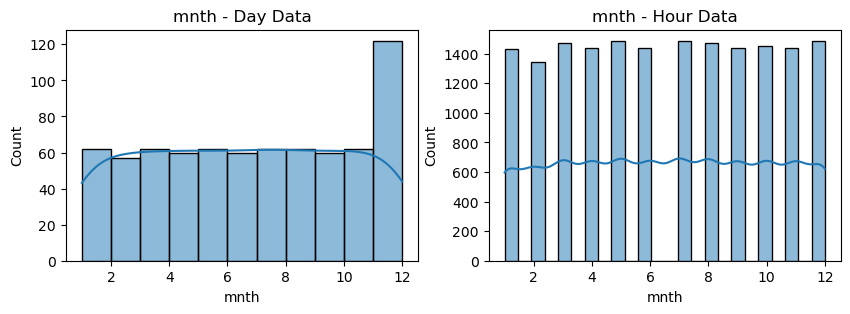

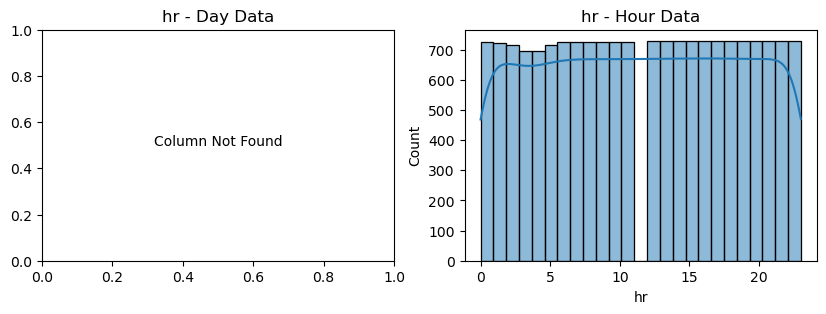

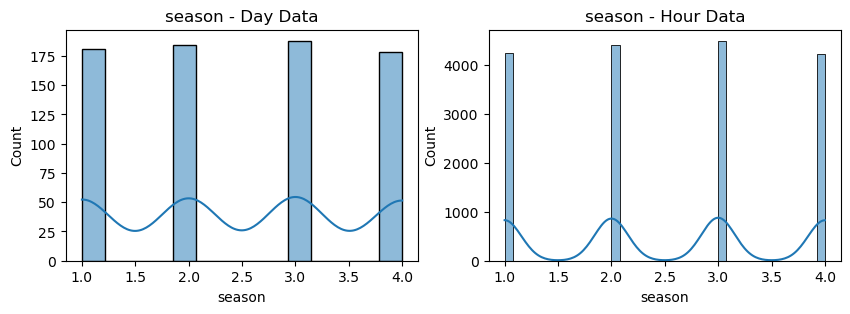

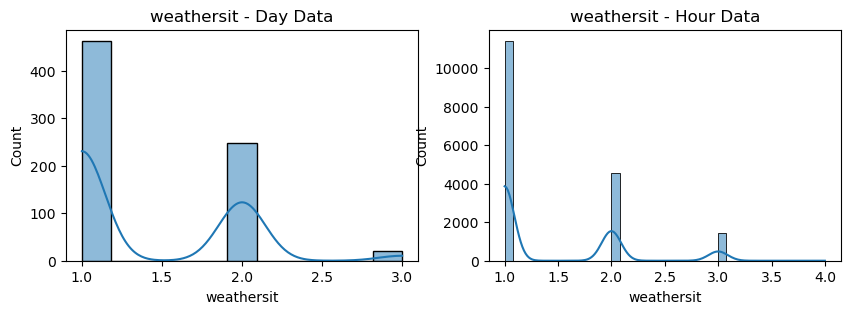

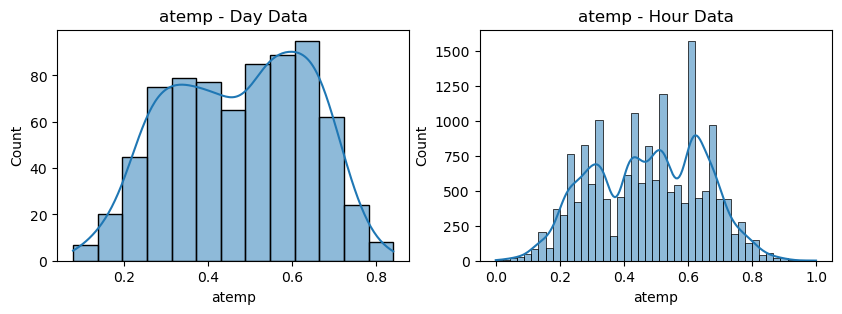

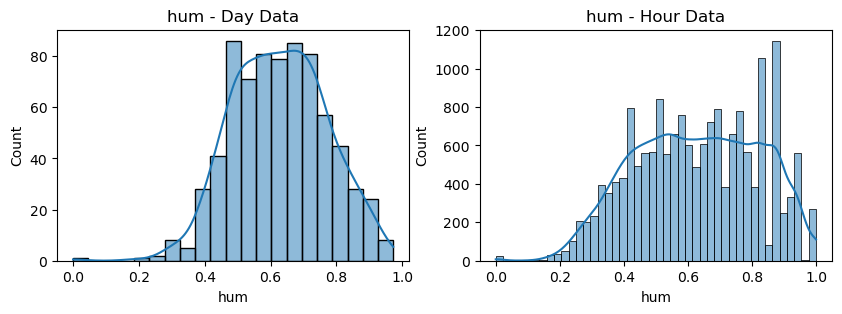

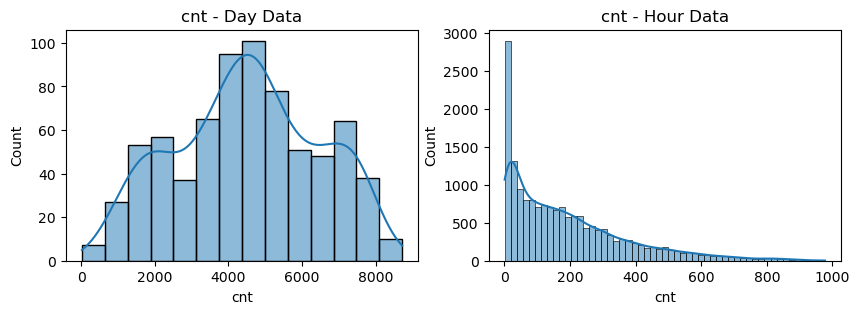

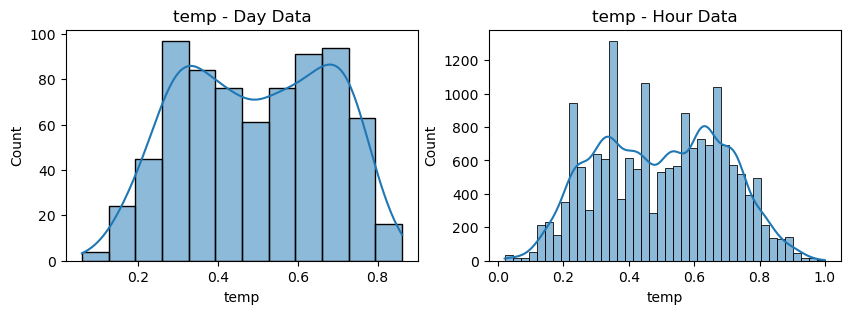

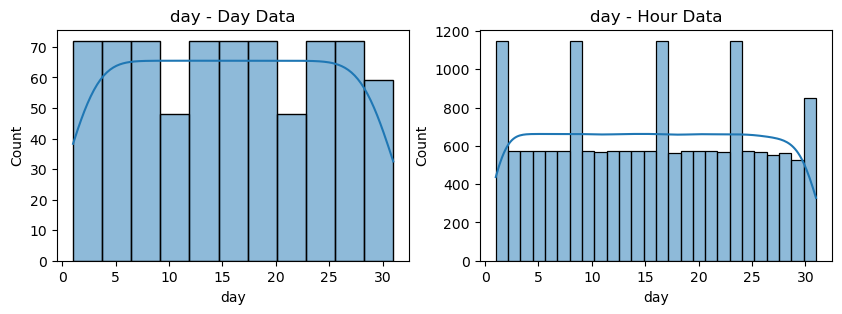

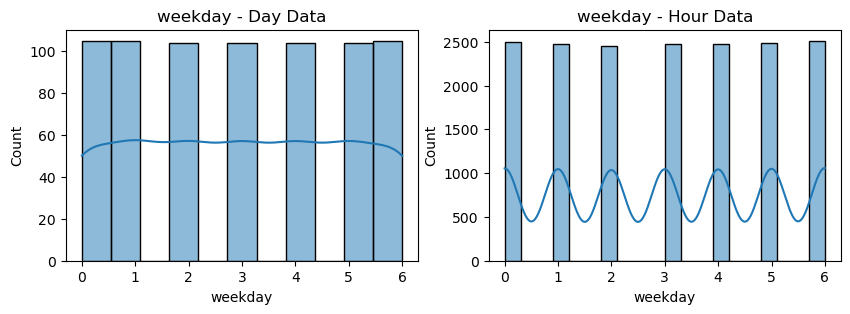

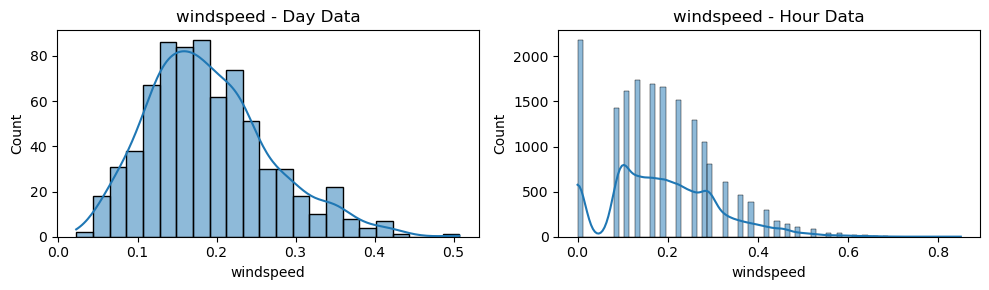

In [106]:
all_columns = set(num_cols) | set(num_cols_hour)  # union of columns
for i in all_columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # ---- Day dataset ----
    if i in data_day.columns:
        sns.histplot(data_day[i], ax=axes[0],kde=True)
        axes[0].set_title(f"{i} - Day Data")
    else:
        axes[0].text(0.5, 0.5, "Column Not Found", ha='center')
        axes[0].set_title(f"{i} - Day Data")

    # ---- Hour dataset ----
    if i in data_hour.columns:
        sns.histplot(data_hour[i], ax=axes[1],kde=True)
        axes[1].set_title(f"{i} - Hour Data")
    else:
        axes[1].text(0.5, 0.5, "Column Not Found", ha='center')
        axes[1].set_title(f"{i} - Hour Data")

plt.tight_layout()
plt.show()

### Insight:
* Humidity feature is slightly left-skewed and higher values are common in both datsets.
* Weekday, season and mnth follow uniform distribution it means rentals occured almost equally in all these time.
* Windspeed is Highly right-skewed means Most values are low.
* Temp and atemp follow mostly normal distribution means most day have normal temprature.
* For weathersit most rental occurs in clear and mist weather.

### CountPlot

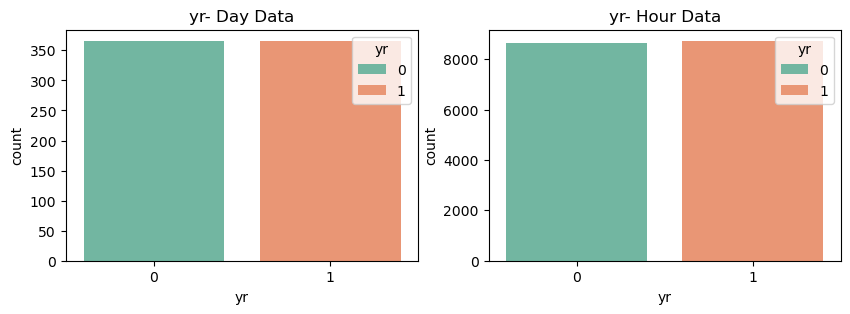

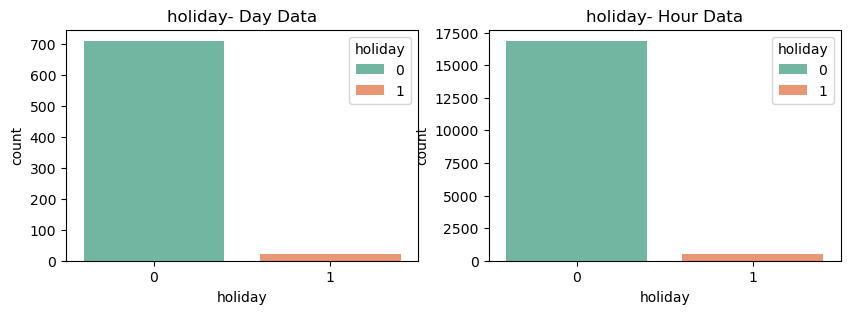

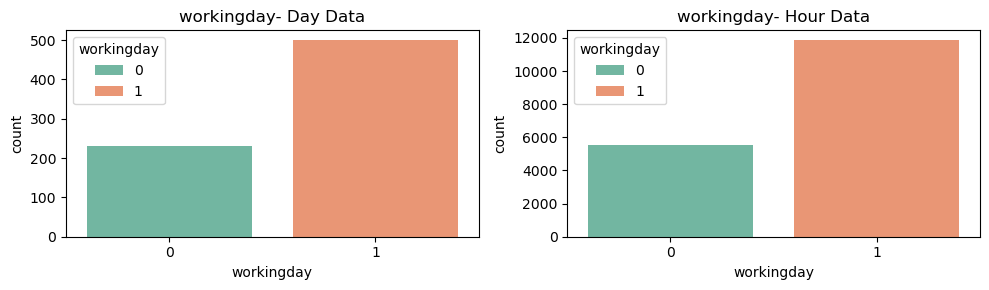

In [107]:
all_binary_cols= set(binary_cols) | set(binary_cols_hour)
for i in all_binary_cols:
    fig, axes =plt.subplots(1,2,figsize=(10,3))

    # ---- Day dataset ----
    if i in data_day.columns:
        sns.countplot(data=data_day,x=i,hue=i,ax=axes[0],palette='Set2')
        axes[0].set_title(f"{i}- Day Data")
    else:
        axes[0].text(0.5, 0.5, "Column Not Found", ha='center')
        axes[0].set_title(f"{i} - Day Data")

    # ---- Day dataset ----
    if i in data_hour.columns:
        sns.countplot(data=data_hour,x=i,hue=i,ax=axes[1],palette='Set2')
        axes[1].set_title(f"{i}- Hour Data")
    else:
        axes[1].text(0.5, 0.5, "Column Not Found", ha='center')
        axes[1].set_title(f"{i} - Hour Data")
plt.tight_layout()
plt.show()

### Insight:
* Mostly rentals are occure in working day compared to non-working day.
* While holiday, rentals are mostly occured.
* The frequency of rentals are similar in both year(2011 & 2012).

### Scatter Plot

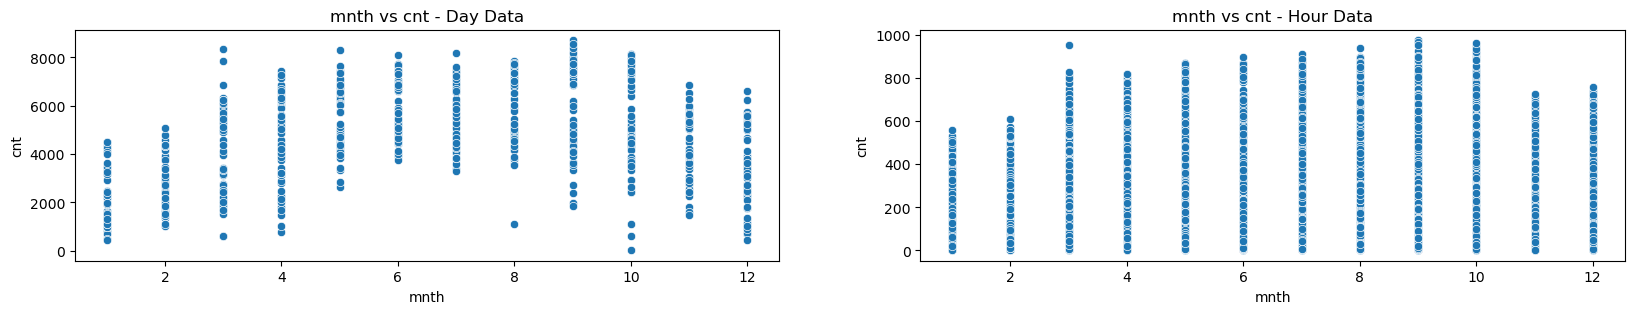

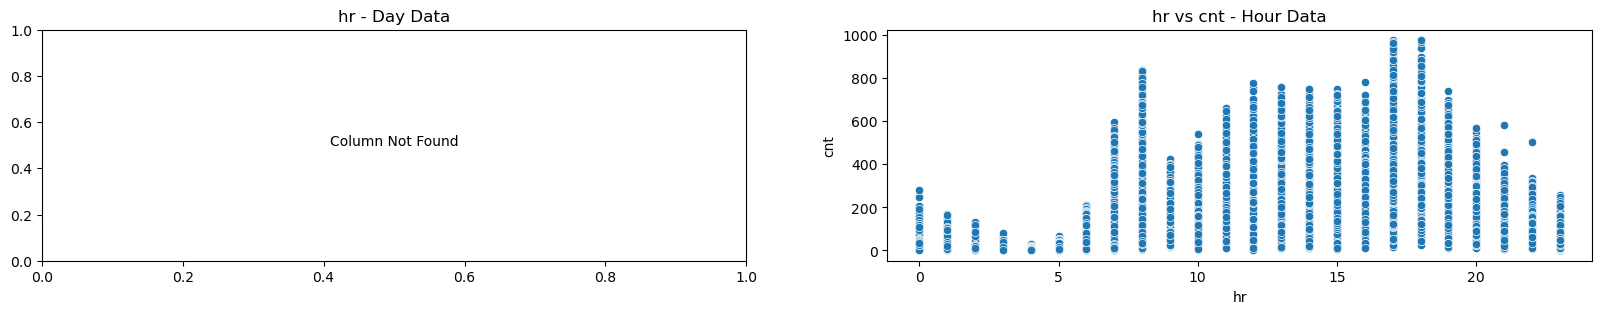

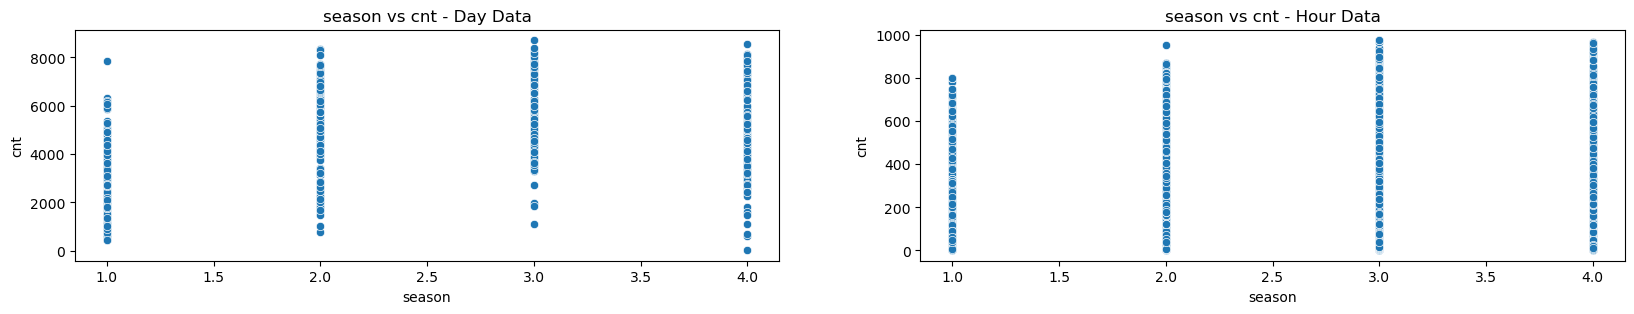

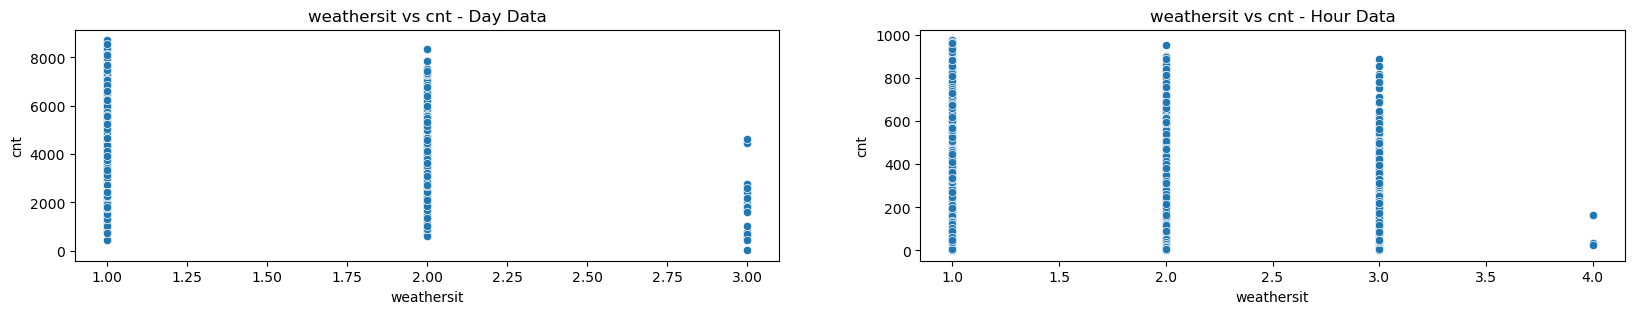

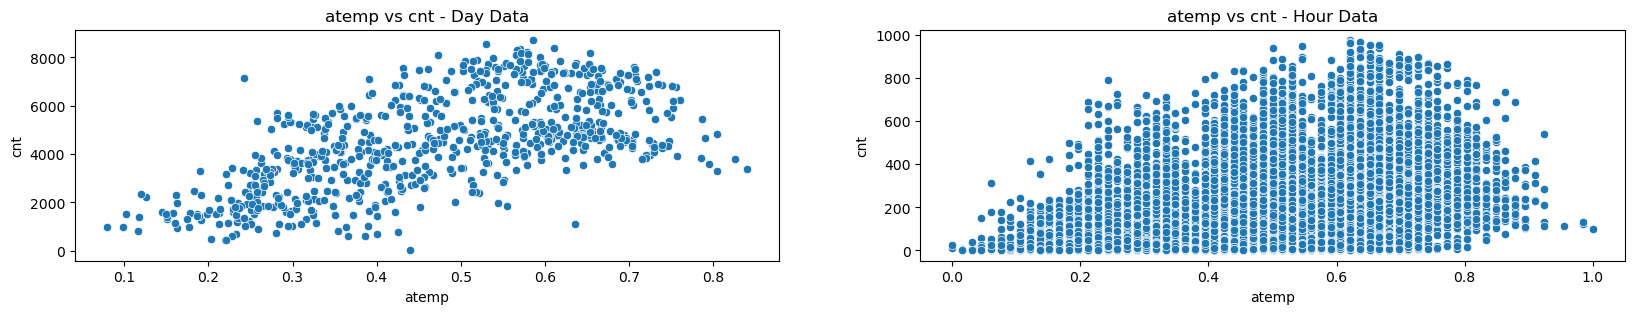

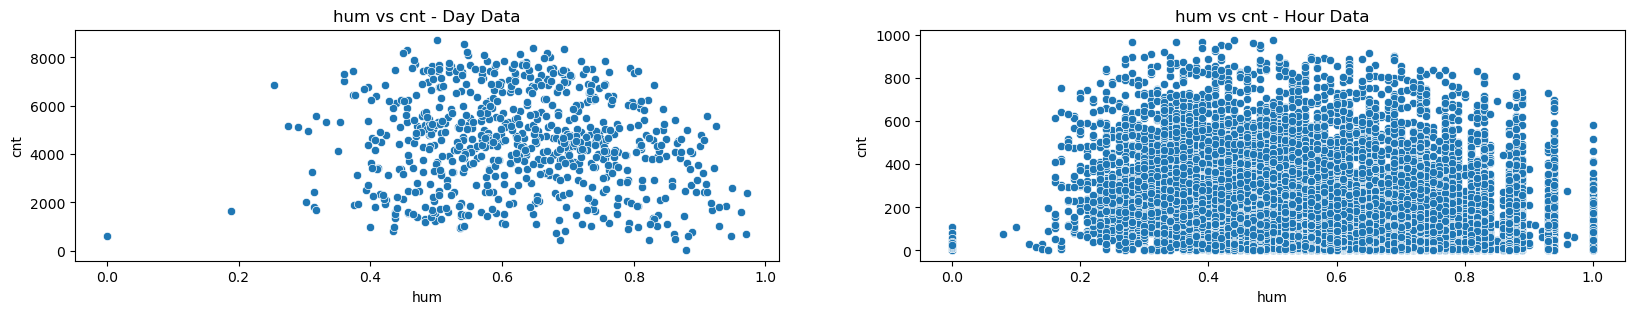

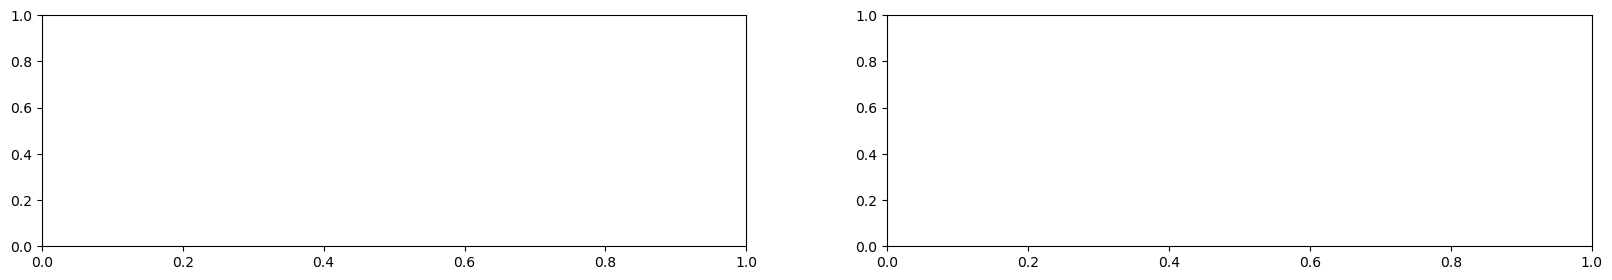

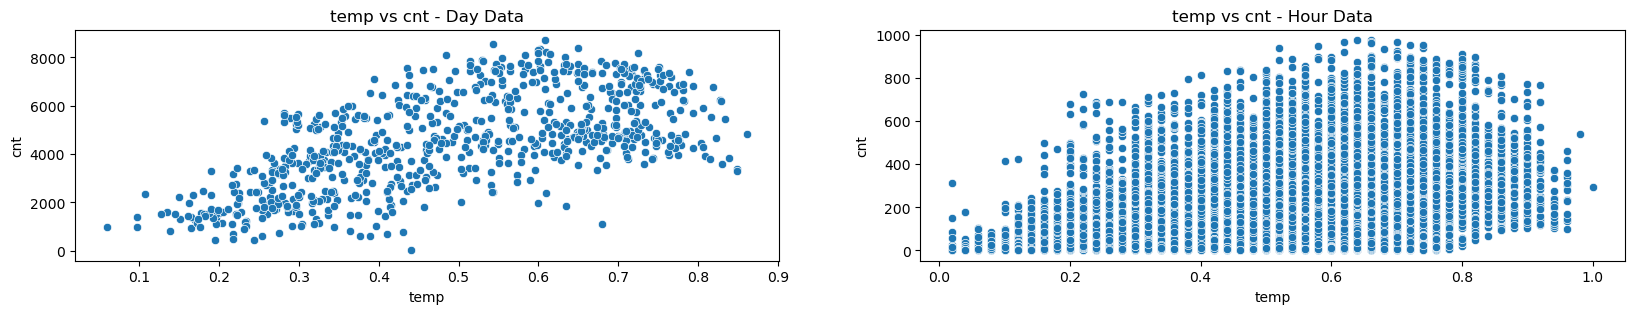

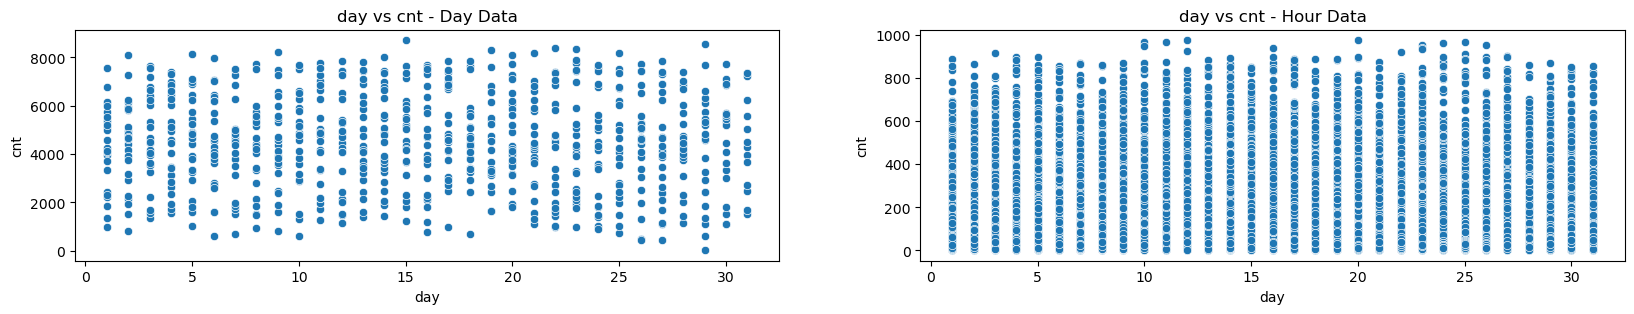

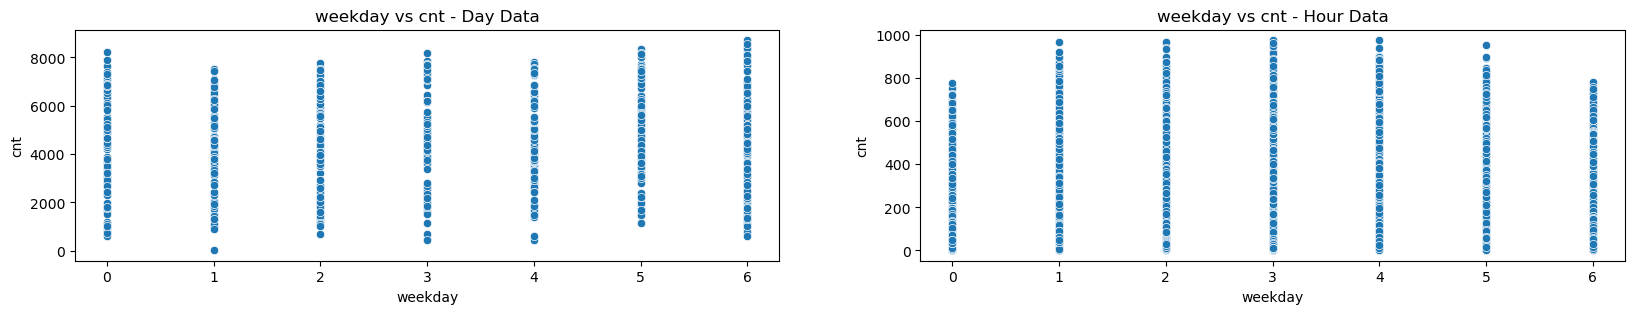

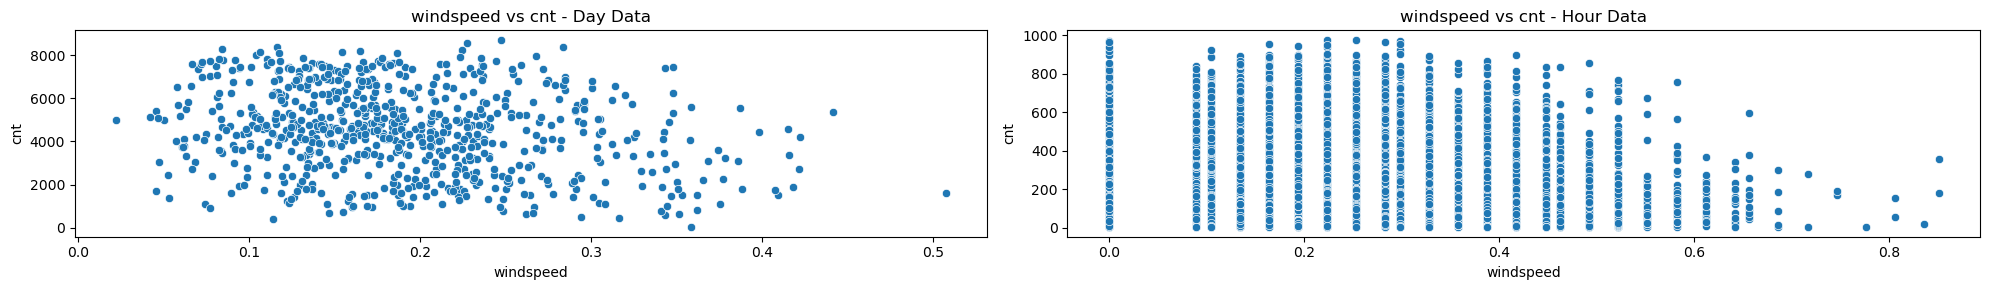

In [108]:
all_cols = set(num_cols) | set(num_cols_hour)

for i in all_cols:
    fig, axes = plt.subplots(1, 2, figsize=(20, 3))

    # ---- Day Dataset ----
    if i == 'cnt':
        continue
    elif i in data_day.columns:
        sns.scatterplot(data=data_day, x=i, y='cnt', ax=axes[0])
        axes[0].set_title(f"{i} vs cnt - Day Data")
    else:
        axes[0].text(0.5, 0.5, "Column Not Found", ha='center')
        axes[0].set_title(f"{i} - Day Data")

    # ---- Hour Dataset ----
    if i == 'cnt':
        continue
    elif i in data_hour.columns:
        sns.scatterplot(data=data_hour, x=i, y='cnt', ax=axes[1])
        axes[1].set_title(f"{i} vs cnt - Hour Data")
    else:
        axes[1].text(0.5, 0.5, "Column Not Found", ha='center')
        axes[1].set_title(f"{i} - Hour Data")

plt.tight_layout()
plt.show()

### Insight:
* Rentals increase when temperature and feels-like temperature (temp & atemp) are higher.
* Rentals are higher when windspeed is normal, and lower when windspeed increases.
* Very few rentals occur during bad weather conditions.
* Rentals remain almost the same throughout the weekdays,
* In all season,rentals frequency is similar but the fall season shows high frequency.
* Rentals are increasing in certain months and decreasing in others.

### BoxPlot

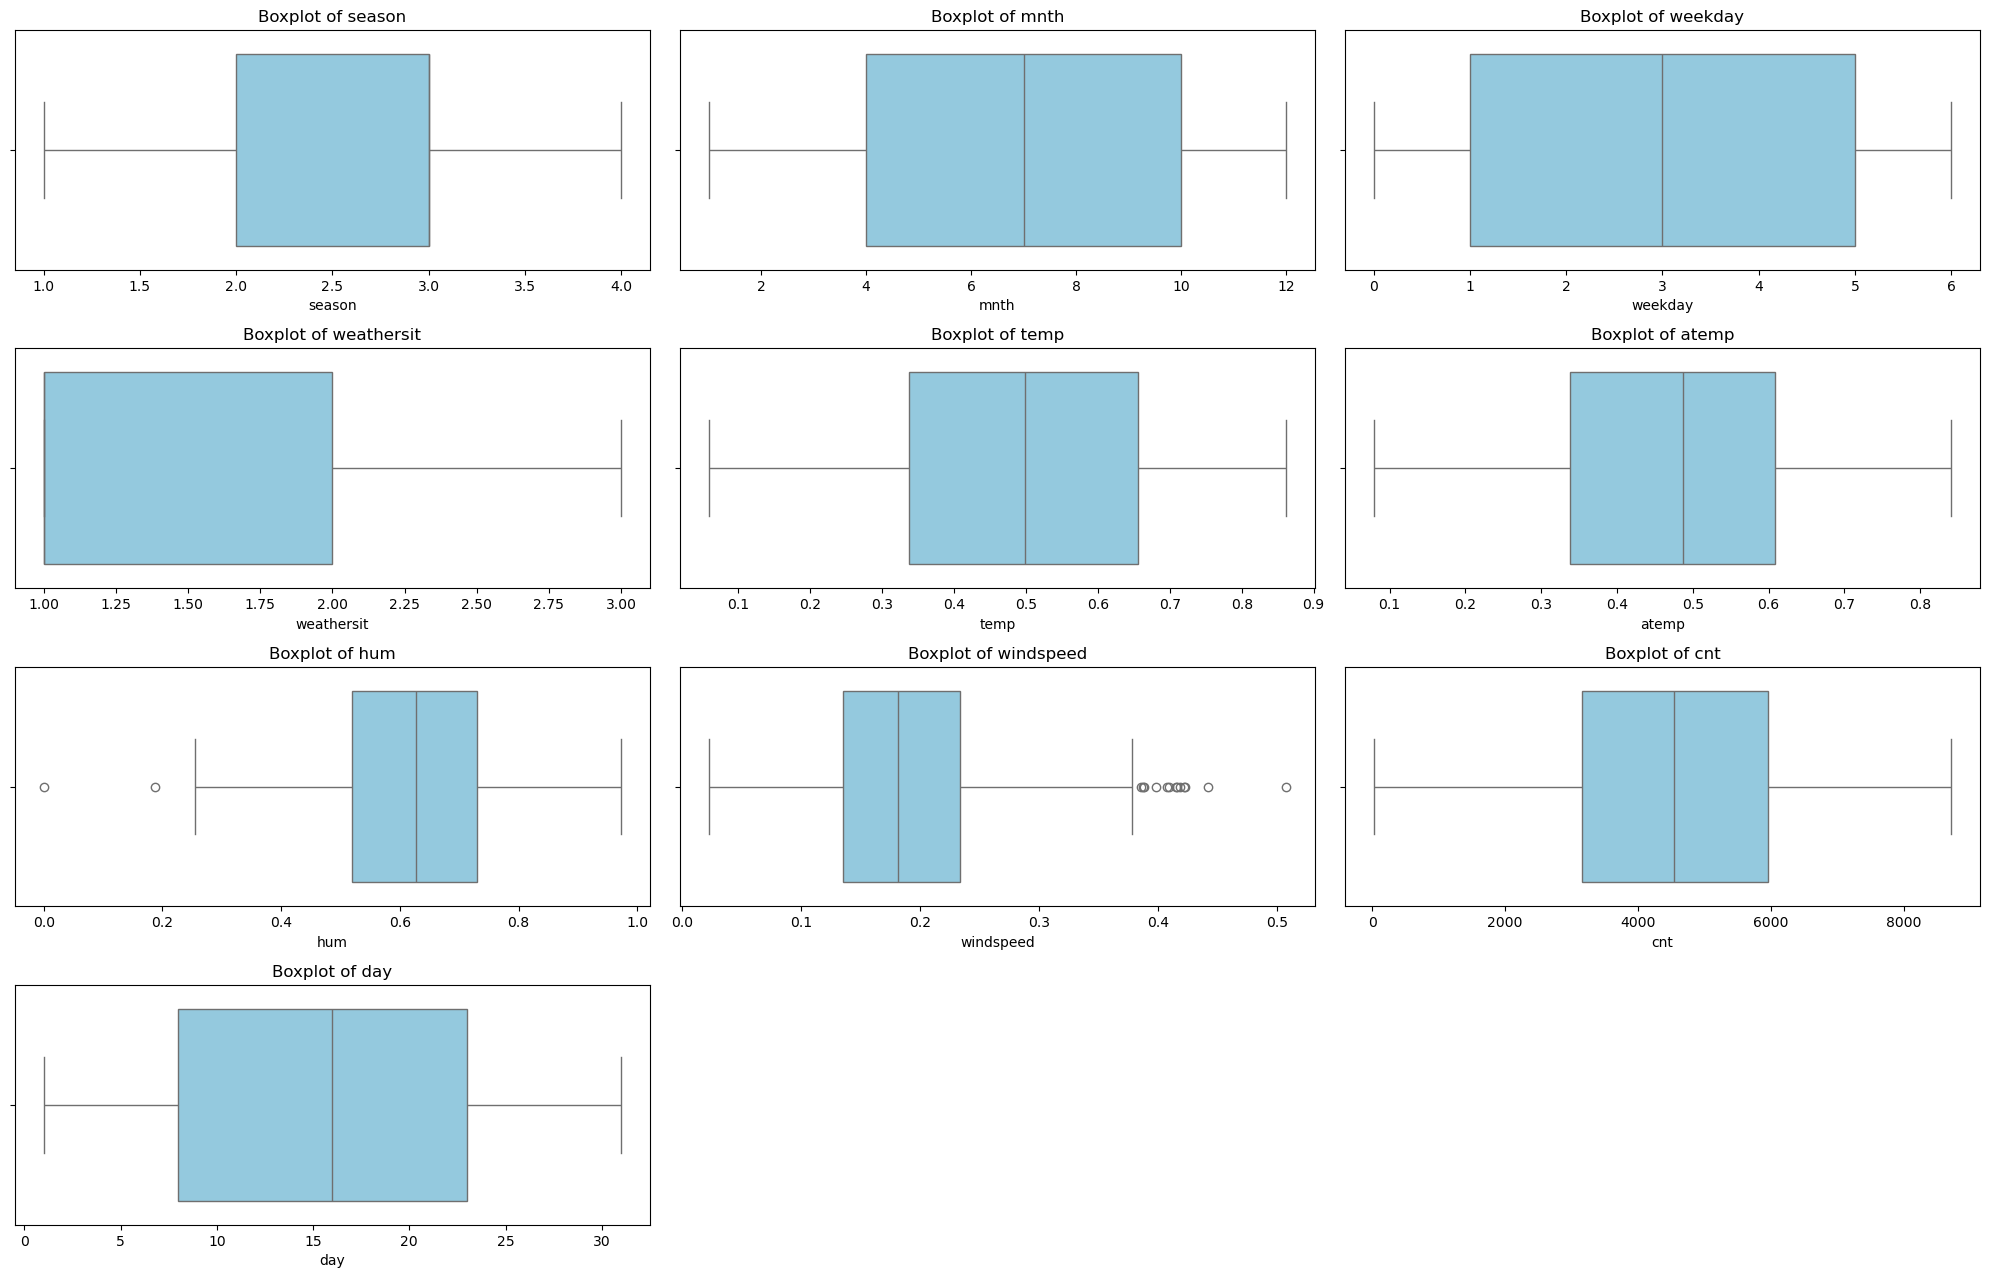

In [109]:
plt.figure(figsize=(20, 22))
plotnumber = 1
for col in num_cols:
    plt.subplot(7, 3, plotnumber)
    sns.boxplot(x=data_day[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plotnumber += 1
plt.tight_layout()
plt.show()

### Insight:
* In the day dataset, **humidity (hum) and windspeed** contain outliers.

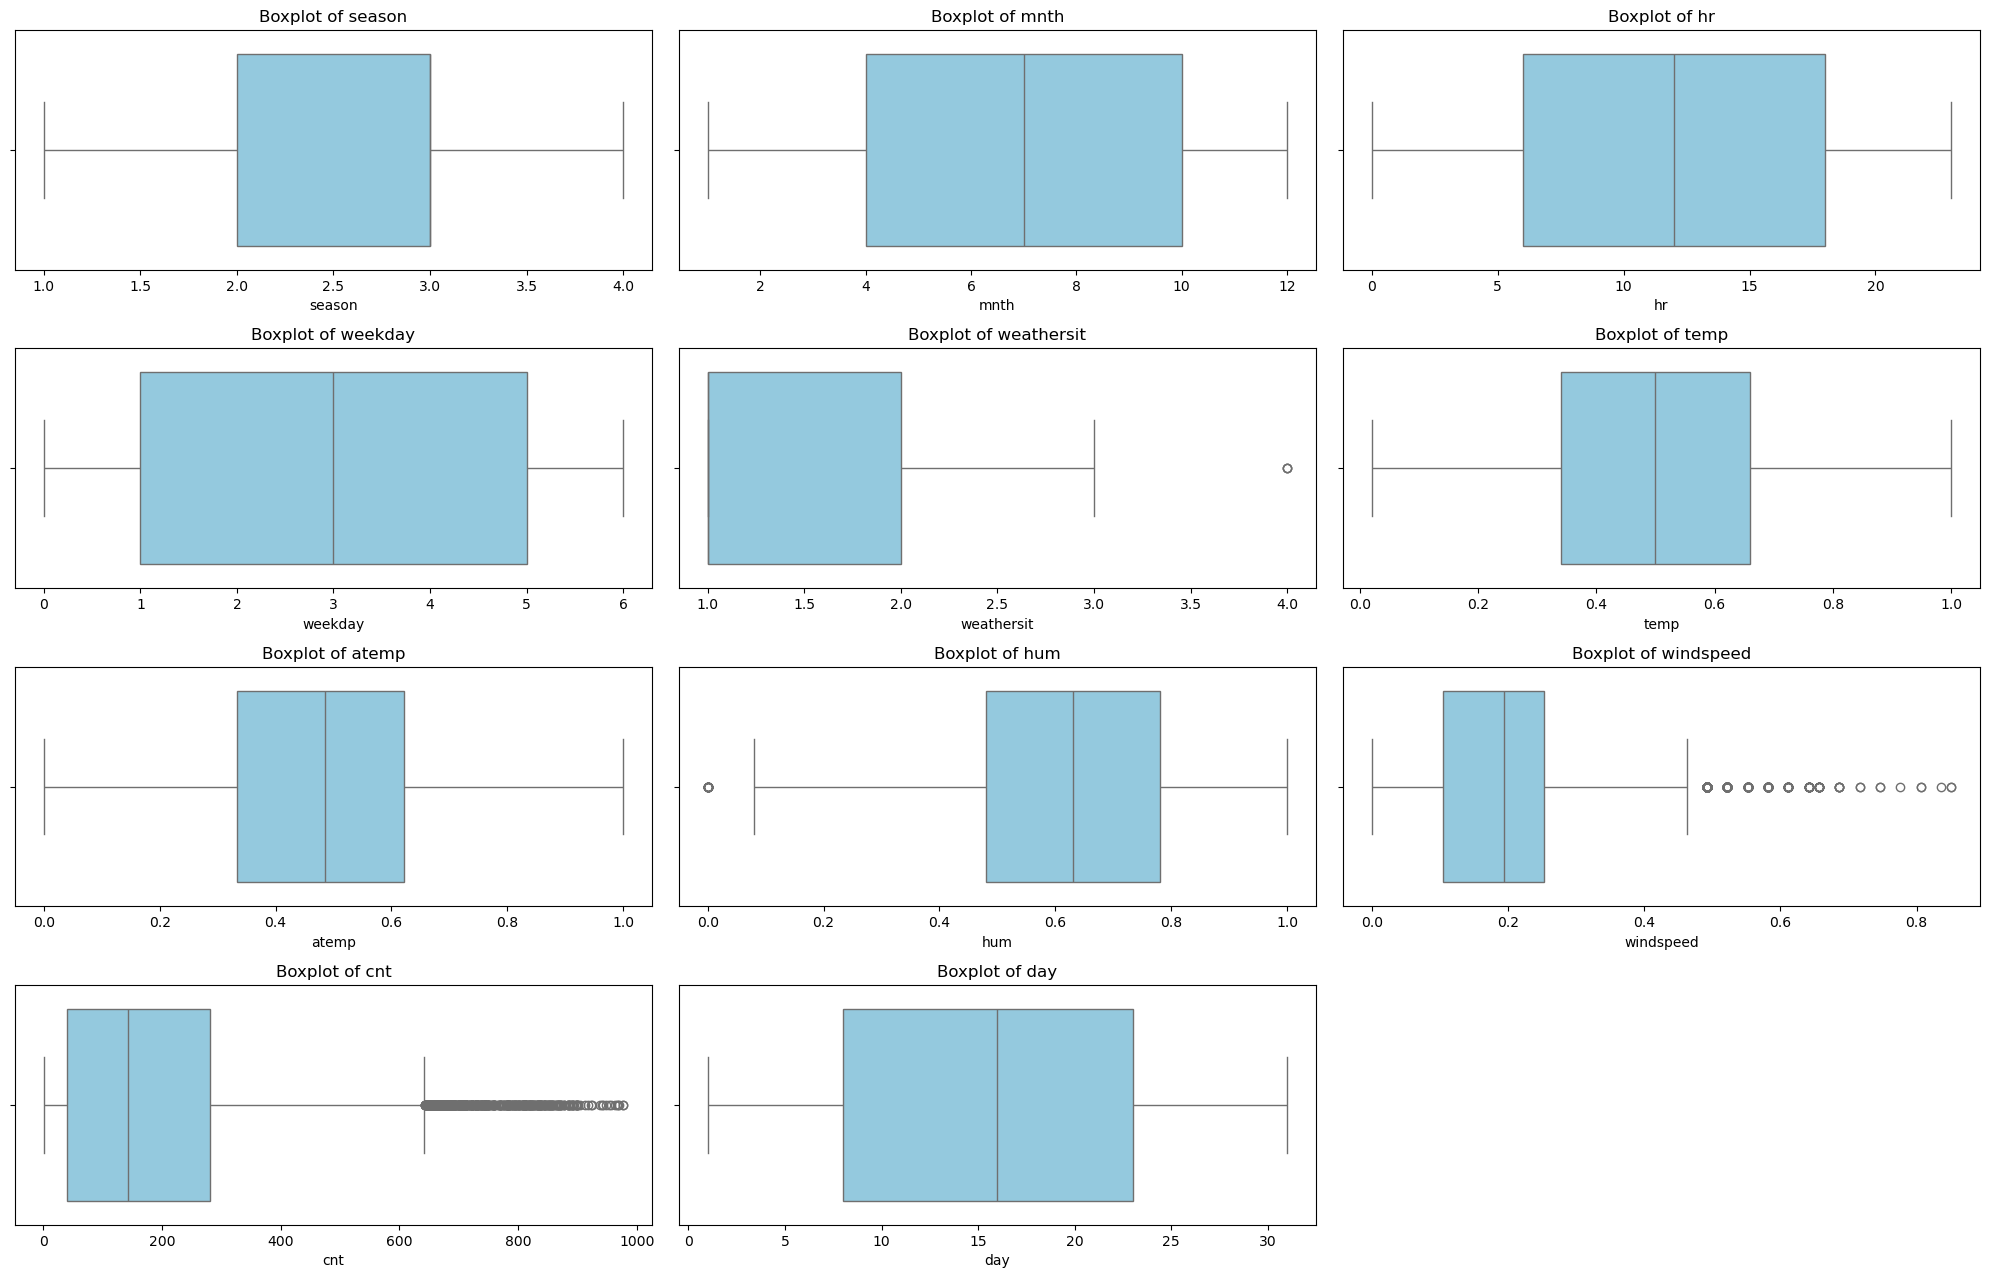

In [110]:
plt.figure(figsize=(20, 22))
plotnumber = 1
for col in num_cols_hour:
    plt.subplot(7, 3, plotnumber)
    sns.boxplot(x=data_hour[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plotnumber += 1
plt.tight_layout()
plt.show()

### Insight:
* In the day dataset, **weathersit, humidity (hum), windspeed and cnt** contain outliers.
* Weathersit is a categorical feature, so the outliers are just less frequent categories and do not require capping.

## HeatMap

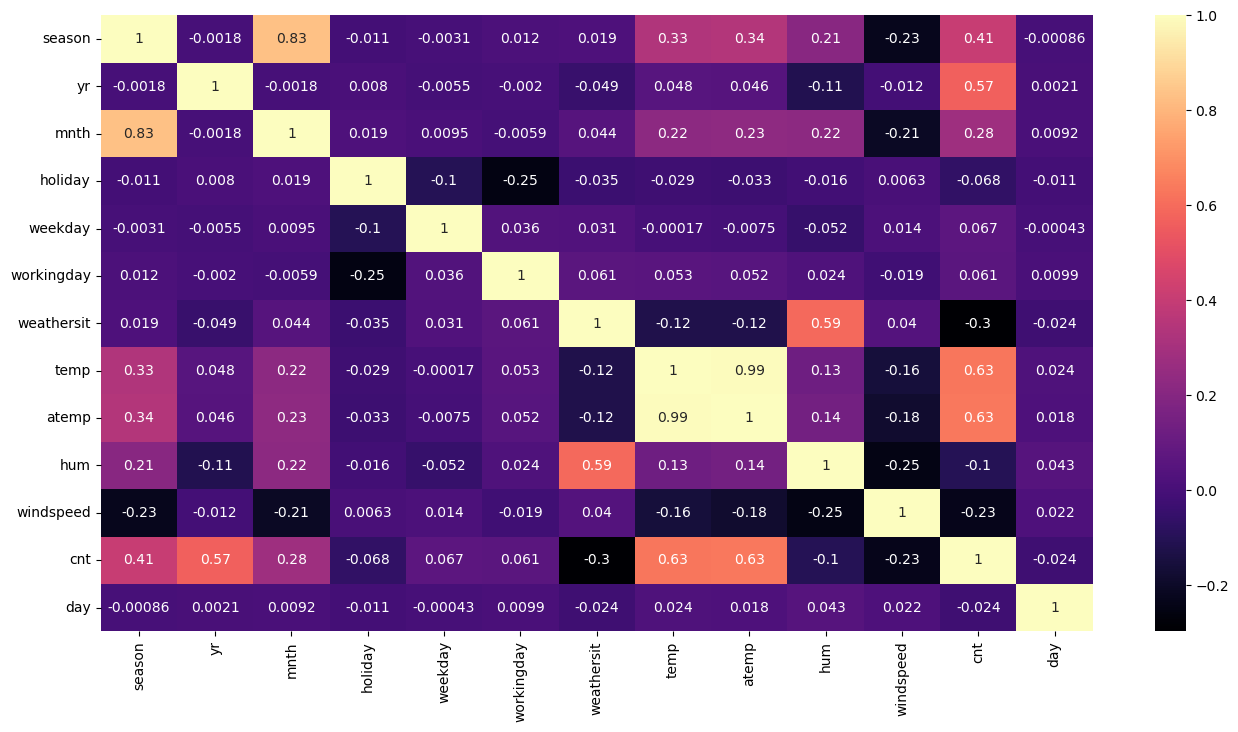

In [111]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_day.corr(),annot=True,cmap='magma')
plt.show()

### Insight:
* Temperature and atemp have the strongest effect on the target variable.
* Mnth and Season are showing equal effect on rentals.
* Weathersit and humidity are also close to effect target variable.
* Overall, the most effected features are temprature, month, humidity, weathersit, year and season.

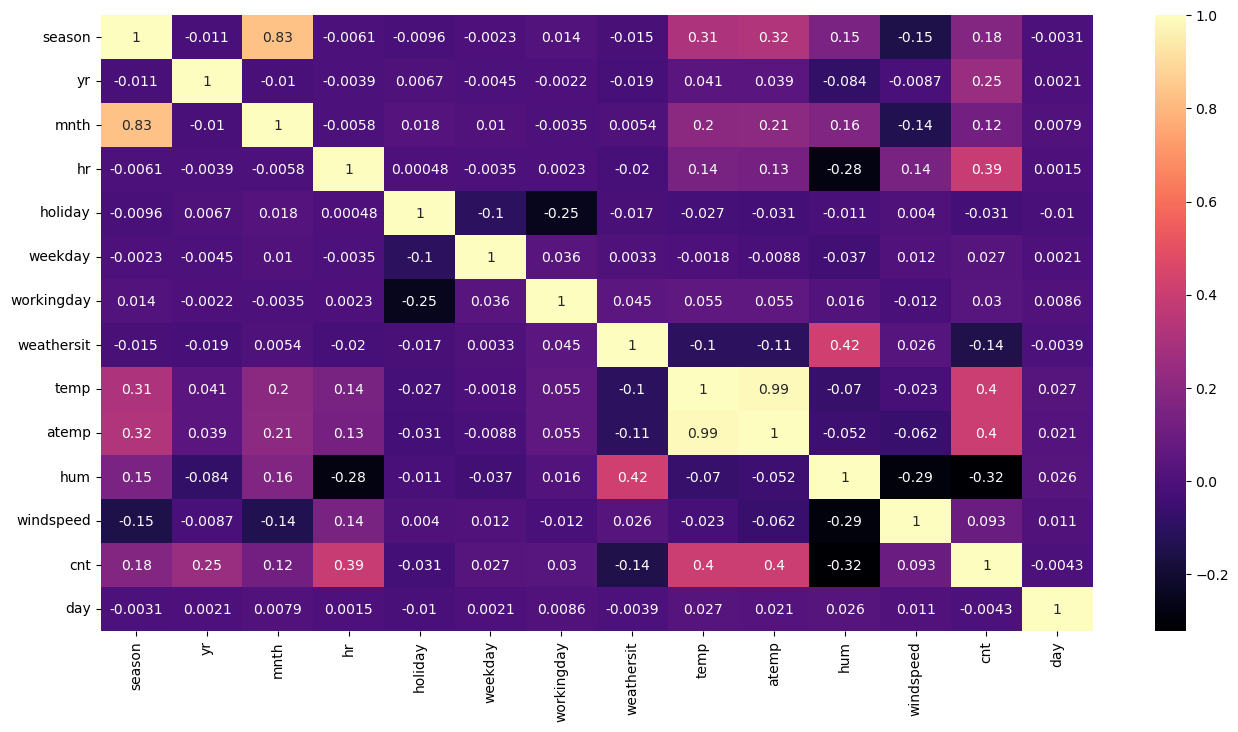

In [112]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_hour.corr(),annot=True,cmap='magma')
plt.show()

### Insight:
* Same like of Day data, temprature has the strongest effect to target variable.
* Month and season are showing equal effect on rentals.
* Weathersit and humidity are also close to effect target variable.
* Year has little effect to target variable.
* Overall, the most effected features are Temprature, atemp, season, month, humidity and weathersit.

# Data Preprocessing

### Capping outliers for Day data

In [113]:
outlier_features = ['hum', 'windspeed']

for feature in outlier_features:
    Q1 = data_day[feature].quantile(0.25)
    Q3 = data_day[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data_day[feature] = data_day[feature].clip(lower, upper)

print("Outliers capped successfully!")

Outliers capped successfully!


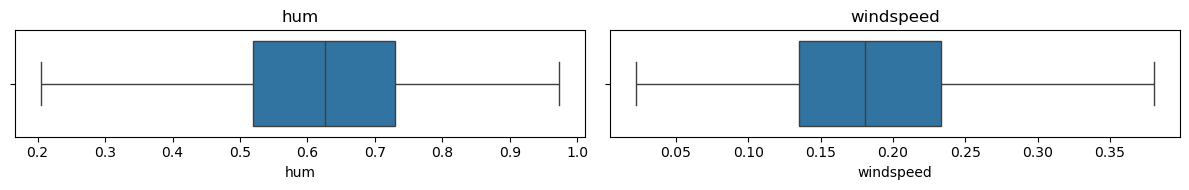

In [114]:
cols = ['hum', 'windspeed']
plt.figure(figsize=(12,2))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(x=data_day[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Capping outliers for Hour data

In [115]:
data_hour.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

In [116]:
outlier_features = ['windspeed', 'cnt','hum']

for feature in outlier_features:
    Q1 = data_hour[feature].quantile(0.25)
    Q3 = data_hour[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data_hour[feature] = data_hour[feature].clip(lower, upper)

print("Outliers capped successfully!")

Outliers capped successfully!


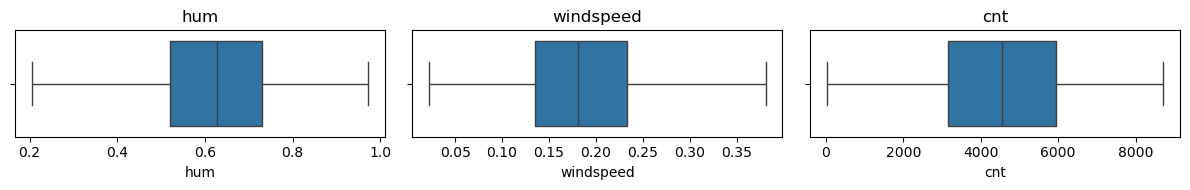

In [117]:
cols = ['hum', 'windspeed','cnt']
plt.figure(figsize=(12,2))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(x=data_day[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Insight:
* **Capped outliers** from both datasets using **IQR method** to reduce the effect of extreme values and prevent them from disturbing model training.

# Encoding

### One-Hot encoding - Weathersit

In [118]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')


In [119]:
# ---- Before Encoding (Check Unique Values) ----
print("Before Encoding (Day):", data_day['weathersit'].unique())
print("Before Encoding (Hour):", data_hour['weathersit'].unique())

data_day = pd.get_dummies(data_day, columns=['weathersit'], drop_first=True)
data_hour = pd.get_dummies(data_hour, columns=['weathersit'], drop_first=True)

print("\nAfter Encoding - Day dataset columns:")
print([col for col in data_day.columns if 'weathersit' in col])

print("\nAfter Encoding - Hour dataset columns:")
print([col for col in data_hour.columns if 'weathersit' in col])

Before Encoding (Day): [2 1 3]
Before Encoding (Hour): [1 2 3 4]

After Encoding - Day dataset columns:
['weathersit_2', 'weathersit_3']

After Encoding - Hour dataset columns:
['weathersit_2', 'weathersit_3', 'weathersit_4']


### Insight:
* The categorical feature **weathersit** was transformed using **one-hot encoding**, creating separate columns for each weather category.
* This helps the model to understand the impact of different weather conditions on bike rentals.
* Cretae dummies of weathersit column(remove) and **make new columns**.
* This conditions helps improving prediction accuracy.

In [120]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'day', 'weathersit_2',
       'weathersit_3'],
      dtype='object')
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')


### Ordinal encoding - Season

In [121]:
print(data_day['season'].unique())   # check unique values in weathersit column
print(data_hour['season'].unique())

[1 2 3 4]
[1 2 3 4]


In [122]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

before_day = data_day.copy()
before_hour = data_hour.copy()

ord_enc = OrdinalEncoder()

ord_enc.fit(pd.concat([data_day[['season']], data_hour[['season']]], axis=0))

data_day['season'] = ord_enc.transform(data_day[['season']])
data_hour['season'] = ord_enc.transform(data_hour[['season']])

print("Before Day Data:", sorted(before_day['season'].unique()))
print("After Day Encoding:", sorted(data_day['season'].unique()))

print("\nBefore Hour Data:", sorted(before_hour['season'].unique()))
print("After Hour Encoding:", sorted(data_hour['season'].unique()))

Before Day Data: [1, 2, 3, 4]
After Day Encoding: [0.0, 1.0, 2.0, 3.0]

Before Hour Data: [1, 2, 3, 4]
After Hour Encoding: [0.0, 1.0, 2.0, 3.0]


### Insight:
* The categorical feature **season** was encoded using **ordinal encoding**, assigning a numeric value to each season.
* This helpss the model to understand **without creating multiple columns**.
* No any columns were deleted or added.

In [123]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'day', 'weathersit_2',
       'weathersit_3'],
      dtype='object')
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')


### Cyclic encoding - Weekday

In [124]:
# Cyclic encoding for Day dataset
data_day['weekday_sin'] = np.sin(2 * np.pi * data_day['weekday'] / 7)
data_day['weekday_cos'] = np.cos(2 * np.pi * data_day['weekday'] / 7)

# Cyclic encoding for Hour dataset
data_hour['weekday_sin'] = np.sin(2 * np.pi * data_hour['weekday'] / 7)
data_hour['weekday_cos'] = np.cos(2 * np.pi * data_hour['weekday'] / 7)

print("Cyclic Encoding Applied Successfully!")

Cyclic Encoding Applied Successfully!


In [125]:
# Remove weekday column
data_day.drop(columns=['weekday'], inplace=True)
data_hour.drop(columns=['weekday'], inplace=True)

In [126]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day', 'weathersit_2', 'weathersit_3',
       'weekday_sin', 'weekday_cos'],
      dtype='object')
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'day', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'weekday_sin', 'weekday_cos'],
      dtype='object')


### Cyclic encoding - mnth

In [127]:
# Cyclic encoding for Day dataset
data_day['mnth_sin'] = np.sin(2 * np.pi * data_day['mnth'] / 12)
data_day['mnth_cos'] = np.cos(2 * np.pi * data_day['mnth'] / 12)

# Cyclic encoding for Hour dataset
data_hour['mnth_sin'] = np.sin(2 * np.pi * data_hour['mnth'] / 12)
data_hour['mnth_cos'] = np.cos(2 * np.pi * data_hour['mnth'] / 12)

print("Cyclic Encoding Applied Successfully!")

Cyclic Encoding Applied Successfully!


In [128]:
# Remove mnth column
data_day.drop(columns=['mnth'], inplace=True)
data_hour.drop(columns=['mnth'], inplace=True)

In [129]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day', 'weathersit_2', 'weathersit_3',
       'weekday_sin', 'weekday_cos', 'mnth_sin', 'mnth_cos'],
      dtype='object')
Index(['season', 'yr', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'weekday_sin', 'weekday_cos', 'mnth_sin', 'mnth_cos'],
      dtype='object')


### Cycling encoding - hr

In [130]:
# Cyclic encoding for Hour dataset
data_hour['hr_sin'] = np.sin(2 * np.pi * data_hour['hr'] / 24)
data_hour['hr_cos'] = np.cos(2 * np.pi * data_hour['hr'] / 24)

In [131]:
print(data_day.columns)
print(data_hour.columns)

Index(['season', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day', 'weathersit_2', 'weathersit_3',
       'weekday_sin', 'weekday_cos', 'mnth_sin', 'mnth_cos'],
      dtype='object')
Index(['season', 'yr', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'weekday_sin', 'weekday_cos', 'mnth_sin', 'mnth_cos',
       'hr_sin', 'hr_cos'],
      dtype='object')


### Insight:
* The **weekday, month and hour** features were encoded using **cyclic encoding** to capture its circular nature of days.
* Weekday circular (saturday > sunday > monday).
* Month circular (december > january > february).
* Hour circular (0-24).
* **No any columns were deleted or added**.

# Scaling

In [132]:
print(data_day['yr'].unique())   # check unique values in weathersit column
print(data_hour['yr'].unique())

[0 1]
[0 1]


In [133]:
from sklearn.preprocessing import StandardScaler
scal_cols = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()

# Scale Day dataset
data_day[scal_cols] = scaler.fit_transform(data_day[scal_cols])

# Scale Hour dataset
data_hour[scal_cols] = scaler.fit_transform(data_hour[scal_cols])  # use same scaler for consistency

print("Scaled numeric columns - Day dataset:")
print(data_day[scal_cols].head())
print("\nScaled numeric columns - Hour dataset:")
print(data_hour[scal_cols].head())

Scaled numeric columns - Day dataset:
       temp     atemp       hum  windspeed
0 -0.826662 -0.679946  1.257836  -0.388927
1 -0.721095 -0.740652  0.480727   0.776447
2 -1.634657 -1.749767 -1.351928   0.773404
3 -1.614780 -1.610270 -0.267392  -0.390911
4 -1.467414 -1.504971 -1.354165  -0.038969

Scaled numeric columns - Hour dataset:
       temp     atemp       hum  windspeed
0 -1.334648 -1.093281  0.947768  -1.596452
1 -1.438516 -1.181732  0.895902  -1.596452
2 -1.438516 -1.181732  0.895902  -1.596452
3 -1.334648 -1.093281  0.636571  -1.596452
4 -1.334648 -1.093281  0.636571  -1.596452


### Insight:
* Perform **Standard scaling**, which transforms the data to have a mean of 0 and standard deviation of 1.
* Choose standard scaler because Linear Regression or gradient-based models perform better when data is centered around 0 with standard deviation 1.

## Train Test Split

In [134]:
from sklearn.model_selection import train_test_split

# ---- Day dataset ----
X_day = data_day.drop(columns=['cnt'])  # features
y_day = data_day['cnt']                 # target

X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(X_day, y_day, test_size=0.2, random_state=42)

# ---- Hour dataset ----
X_hour = data_hour.drop(columns=['cnt'])  # features
y_hour = data_hour['cnt']                 # target

X_train_hour, X_test_hour, y_train_hour, y_test_hour = train_test_split(X_hour, y_hour, test_size=0.2, random_state=42)

print("Day dataset - X_train:", X_train_day.shape, "X_test:", X_test_day.shape)
print("Hour dataset - X_train:", X_train_hour.shape, "X_test:", X_test_hour.shape)

Day dataset - X_train: (584, 15) X_test: (147, 15)
Hour dataset - X_train: (13903, 19) X_test: (3476, 19)


### Insight:
* Data **split into train and test** to evaluate model performance.
* In this model learns from some portion of data and apply testing on other unseen or new data.

# Model Building and Evaluation

In [135]:
# Find minimum and maximum value ranges
# For day dataset
print("Target range (day dataset):")
print("Min:", data_day['cnt'].min())
print("Max:", data_day['cnt'].max())

# For hour dataset
print("Target range (hour dataset):")
print("Min:", data_hour['cnt'].min())
print("Max:", data_hour['cnt'].max())

Target range (day dataset):
Min: 22
Max: 8714
Target range (hour dataset):
Min: 1.0
Max: 642.5


### Insight:
* find range values of target variable(cnt).

## Linear Regression for Day Data

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_day = LinearRegression()
lr_day.fit(X_train_day, y_train_day)

LinearRegression()

In [137]:
y_pred_train_day = lr_day.predict(X_train_day)
y_pred_test_day = lr_day.predict(X_test_day)
print("Day Dataset - Linear Regression\n")

print("R2 Score - Train:", r2_score(y_train_day, y_pred_train_day))
print("R2 Score - Test :", r2_score(y_test_day, y_pred_test_day))

mse_train = mean_squared_error(y_train_day, y_pred_train_day)
mse_test = mean_squared_error(y_test_day, y_pred_test_day)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Day Dataset - Linear Regression

R2 Score - Train: 0.802251461740527
R2 Score - Test : 0.8512723243737742
MSE - Train: 724887.123042274
MSE - Test : 596380.4723157889
RMSE - Train: 851.4030320842616
RMSE - Test : 772.2567398966414


### Insight:
* Model predict **good R2 score with minor gap** between training and testing performance.
* **RMSE** is **low** compared to range value of target figure.

## Linear Regression for Hour Data

In [138]:
lr_hour = LinearRegression()
lr_hour.fit(X_train_hour, y_train_hour)

LinearRegression()

In [139]:
y_pred_train_hour = lr_hour.predict(X_train_hour)
y_pred_test_hour = lr_hour.predict(X_test_hour)
print("Hour Dataset - Linear Regression\n")

print("R2 Score - Train:", r2_score(y_train_hour, y_pred_train_hour))
print("R2 Score - Test :", r2_score(y_test_hour, y_pred_test_hour))

mse_train = mean_squared_error(y_train_hour, y_pred_train_hour)
mse_test = mean_squared_error(y_test_hour, y_pred_test_hour)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Hour Dataset - Linear Regression

R2 Score - Train: 0.5289171425225565
R2 Score - Test : 0.530085652965403
MSE - Train: 14053.990436074972
MSE - Test : 13362.626337358863
RMSE - Train: 118.5495273549202
RMSE - Test : 115.59682667512487


### Insight:
* Model predict **low R2 score in both** traning and testing performance.
* It means model is **underfitted**.
* **RMSE** is **low** compared to range value of target feature.

### Random Forest Classifier - Day Data

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf_day = RandomForestRegressor(n_estimators=100, random_state=42)
rf_day.fit(X_train_day, y_train_day)

RandomForestRegressor(random_state=42)

In [141]:
y_pred_train_day = rf_day.predict(X_train_day)
y_pred_test_day = rf_day.predict(X_test_day)
print("Day Dataset - Random Forest\n")

print("R2 Score - Train:", r2_score(y_train_day, y_pred_train_day))
print("R2 Score - Test :", r2_score(y_test_day, y_pred_test_day))

mse_train = mean_squared_error(y_train_day, y_pred_train_day)
mse_test = mean_squared_error(y_test_day, y_pred_test_day)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Day Dataset - Random Forest

R2 Score - Train: 0.9824538109758155
R2 Score - Test : 0.8815775776915725
MSE - Train: 64319.09228784247
MSE - Test : 474859.97378571425
RMSE - Train: 253.6120901846804
RMSE - Test : 689.1008444238871


### Insight:
* Model predict **high R2 Score but have large gap** between training and testing performance.
* **RMSE** value is **low** relative to target range.

### Random forest clssifier - Hour data

In [142]:
rf_hour = RandomForestRegressor(n_estimators=100, random_state=42)
rf_hour.fit(X_train_hour, y_train_hour)

RandomForestRegressor(random_state=42)

In [143]:
y_pred_train_hour = rf_hour.predict(X_train_hour)
y_pred_test_hour = rf_hour.predict(X_test_hour)
print("Day Dataset - Random Forest\n")

print("R2 Score - Train:", r2_score(y_train_hour, y_pred_train_hour))
print("R2 Score - Test :", r2_score(y_test_hour, y_pred_test_hour))

mse_train = mean_squared_error(y_train_hour, y_pred_train_hour)
mse_test = mean_squared_error(y_test_hour, y_pred_test_hour)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Day Dataset - Random Forest

R2 Score - Train: 0.9927693455527895
R2 Score - Test : 0.9466356162901305
MSE - Train: 215.71480862583616
MSE - Test : 1517.48573700374
RMSE - Train: 14.687232844407287
RMSE - Test : 38.95491929145458


### Insight:
* Model predict **high R2 Score with minor gap** between training and testing performance.
* **RMSE** value is **low** relative to target variable.

### Gradient Boosting - Day Data

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
gb_day = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_day.fit(X_train_day, y_train_day)

GradientBoostingRegressor(random_state=42)

In [145]:
y_pred_train_day = gb_day.predict(X_train_day)
y_pred_test_day = gb_day.predict(X_test_day)
print("Day Dataset - Gradient Boosting \n")
print("R2 Score - Train:", r2_score(y_train_day, y_pred_train_day))
print("R2 Score - Test :", r2_score(y_test_day, y_pred_test_day))

mse_train = mean_squared_error(y_train_day, y_pred_train_day)
mse_test = mean_squared_error(y_test_day, y_pred_test_day)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Day Dataset - Gradient Boosting 

R2 Score - Train: 0.9562711790911957
R2 Score - Test : 0.8899909290071927
MSE - Train: 160296.806548432
MSE - Test : 441123.4253575787
RMSE - Train: 400.37083628610117
RMSE - Test : 664.1712319557199


### Insight:
* Model predict **high R2 Score with large gap** between training and testing performance.
* **RMSE** vale is **some related** to target variable.

### Gradient Boosting - Hour Data

In [146]:
gb_hour = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_hour.fit(X_train_hour, y_train_hour)

GradientBoostingRegressor(random_state=42)

In [147]:
y_pred_train_hour = gb_hour.predict(X_train_hour)
y_pred_test_hour = gb_hour.predict(X_test_hour)
print("Hour Dataset - Gradient Boosting\n")

print("R2 Score - Train:", r2_score(y_train_hour, y_pred_train_hour))
print("R2 Score - Test :", r2_score(y_test_hour, y_pred_test_hour))

mse_train = mean_squared_error(y_train_hour, y_pred_train_hour)
mse_test = mean_squared_error(y_test_hour, y_pred_test_hour)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Hour Dataset - Gradient Boosting

R2 Score - Train: 0.8631784962307666
R2 Score - Test : 0.8650002428747898
MSE - Train: 4081.8469084587205
MSE - Test : 3838.8938781764186
RMSE - Train: 63.889333291706215
RMSE - Test : 61.958807914423424


### Insight:
* Model raise **good R2 Score with no gap** between training and tetsing performance.
* **RMSE** value is also **good** not much high.

### XGBoost - Day Data

In [148]:
from xgboost import XGBRegressor
xgb_day = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, objective='reg:squarederror')
xgb_day.fit(X_train_day, y_train_day)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [149]:
y_pred_train_day = xgb_day.predict(X_train_day)
y_pred_test_day = xgb_day.predict(X_test_day)
print("Day Dataset - XGBoost\n")

print("R2 Score - Train:", r2_score(y_train_day, y_pred_train_day))
print("R2 Score - Test :", r2_score(y_test_day, y_pred_test_day))

mse_train = mean_squared_error(y_train_day, y_pred_train_day)
mse_test = mean_squared_error(y_test_day, y_pred_test_day)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Day Dataset - XGBoost

R2 Score - Train: 0.951206386089325
R2 Score - Test : 0.8919005990028381
MSE - Train: 178862.8177419869
MSE - Test : 433465.7826956544
RMSE - Train: 422.9217631453682
RMSE - Test : 658.3811834307344


### Insight:
* Model predict **high R2 Score but have gap** between training and testing performance.
* **RMSE** value is **more related** to target variable.

## XGBoost - Hour Data

In [150]:
xgb_hour = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42,objective='reg:squarederror')
xgb_hour.fit(X_train_hour, y_train_hour)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [151]:
y_pred_train_hour = xgb_hour.predict(X_train_hour)
y_pred_test_hour = xgb_hour.predict(X_test_hour)
print("Hour Dataset - XGBoost \n")

print("R2 Score - Train:", r2_score(y_train_hour, y_pred_train_hour))
print("R2 Score - Test :", r2_score(y_test_hour, y_pred_test_hour))

mse_train = mean_squared_error(y_train_hour, y_pred_train_hour)
mse_test = mean_squared_error(y_test_hour, y_pred_test_hour)
print("MSE - Train:", mse_train)
print("MSE - Test :", mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test :", rmse_test)

Hour Dataset - XGBoost 

R2 Score - Train: 0.8805902482144072
R2 Score - Test : 0.8830843972637145
MSE - Train: 3562.395623044215
MSE - Test : 3324.647400597566
RMSE - Train: 59.685807551244665
RMSE - Test : 57.6597554677226


### Insight:
* Model predict **good R2 Score and have no gap** between training and testing performance.
* **RMSE** value is **minor**.

### Model Selection

In [152]:
score = {'Model': ['LinearRegression','RandomForest','Gradient Boosting','XGBoost'],
        'Train R2 Score': [0.79,0.98,0.94,0.94],
        'Test R2 Score': [0.83,0.86,0.87,0.87],
        'Train MSE': [744309.36,66270.68,185862.03,19559.89],
        'Test MSE': [64415.37,525325.82,498403.86,490658.97],
        'Train RMSE': [862.73,257.43,431.11,442.22],
        'Test RMSE': [802.59,724.79,705.97,700.47]}
table = pd.DataFrame(score)
table

,Model,Train R2 Score,Test R2 Score,Train MSE,Test MSE,Train RMSE,Test RMSE
0,LinearRegression,0.79,0.83,744309.36,64415.37,862.73,802.59
1,RandomForest,0.98,0.86,66270.68,525325.82,257.43,724.79
2,Gradient Boosting,0.94,0.87,185862.03,498403.86,431.11,705.97
3,XGBoost,0.94,0.87,19559.89,490658.97,442.22,700.47


In [153]:
score={'Model':['LineaeRegression','RandomForest','Gradient Boosting','XGBoost'],
      'Train R2 Score':[0.52,0.99,0.86,0.88],
      'Test R2 Score':[0.53,0.94,0.86,0.88],
      'Train MSE':[14054.12,215.79,4081.84,3562.39],
      'Test MSE':[13362.67,1520.16,3838.89,3324.64],
      'Train RMSE':[118.55,14.68,63.88,59.68],
      'Test RMSE':[115.59,38.98,61.95,57.65]}
table=pd.DataFrame(score)
table

,Model,Train R2 Score,Test R2 Score,Train MSE,Test MSE,Train RMSE,Test RMSE
0,LineaeRegression,0.52,0.53,14054.12,13362.67,118.55,115.59
1,RandomForest,0.99,0.94,215.79,1520.16,14.68,38.98
2,Gradient Boosting,0.86,0.86,4081.84,3838.89,63.88,61.95
3,XGBoost,0.88,0.88,3562.39,3324.64,59.68,57.65


### Insight:
* For **day data**, **XGBoost** perfrom well, predict high R2 Score with minor gap between training and testing performance and low RMSE value.
* For **hour data**, **RandomForest** perform well, predict high R2Score with minor gap between training and testing performance and minor RMSE value.

## Project Report and Conclusion:

### Project Report:

* The **goal** of this project is **to predict bike rentals (cnt)** using day-wise and hour-wise datasets.
* The prediction is based on weather conditions, season, month and other environmental factors.

* There are two datasets: **Day dataset and Hour dataset**.
* **cnt** is **target variable** which follow **continious numeric feature** category.
* **No any null and duplicate** values in both dataset.

* During **EDA**, various visualizations such as histplots, count plots, box plots, and scatter plots were used to understand the distribution of features.
* Histplot, scatter plot were for numerical data while countPlot was for binary data.
* Boxplot was used to identify outliers in the dataset.
* In both year, frequency of rentals are same.

* In **Data Preprocessing**  Outliers capping was performed using IQR method.
* Perform encoding on required categorical features like weathersit, season, month, hour and day.
* **Ordinal** encoding for **season**.
* **One-hot** encoding for **weathersit**.
* **Cyclic** encoding for **month, hour and day**.
* Feature scaling was applied using **standard scaler** technique.
* Split data for training and testing.

* In **Model Building and Evaluation** various models like Linear Regression, Random forest, Gradient Boosting and XGBoost were built and evaluated.
* Out of them, the **XGBoost model performed the best for day**, showing high R2 Score and low RMSE.
* As a secondary option, Gradient boosting is also suitable for day data.
* The **Random forest perform best for hour data** with high R2 Score and low RMSE.
* As a secondary option, XGBoost is also suitable for day data.

### Conclusion:

* Bike rentals depend mostly on temperature, atemp, season, month, humidity, and weather conditions.
* Data preprocessing like outlier handling, encoding, and scaling helped improve model performance.
* For the day dataset, XGBoost perform best.
* For the hour dataset, Random Forest performs best.
* These models can help forecast bike demand and manage bike availability efficiently.

## Challenges Faced During the Project

* First of all, **Managing differences between day and hour datasets**.
* Understand both datasets.
* **Handling outliers** in numerical features.
* **Encoding** categorical and cyclic features correctly.
* **Scaling** features for better model performance.
* Understanding which features affect rentals the most.
* **Select final best model** for both datasets.